In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# Show all variables
with Dataset(nc_file, 'r') as dataset:
    for var in dataset.variables:
        print(f"{var}: shape = {dataset.variables[var].shape}")

size: shape = (1000, 30)
max_height: shape = (1000, 30)
surface_area: shape = (1000, 30)
location_x: shape = (1000, 30)
location_y: shape = (1000, 30)
location_z: shape = (1000, 30)
cloud_points: shape = (1000, 30, 100000, 3)


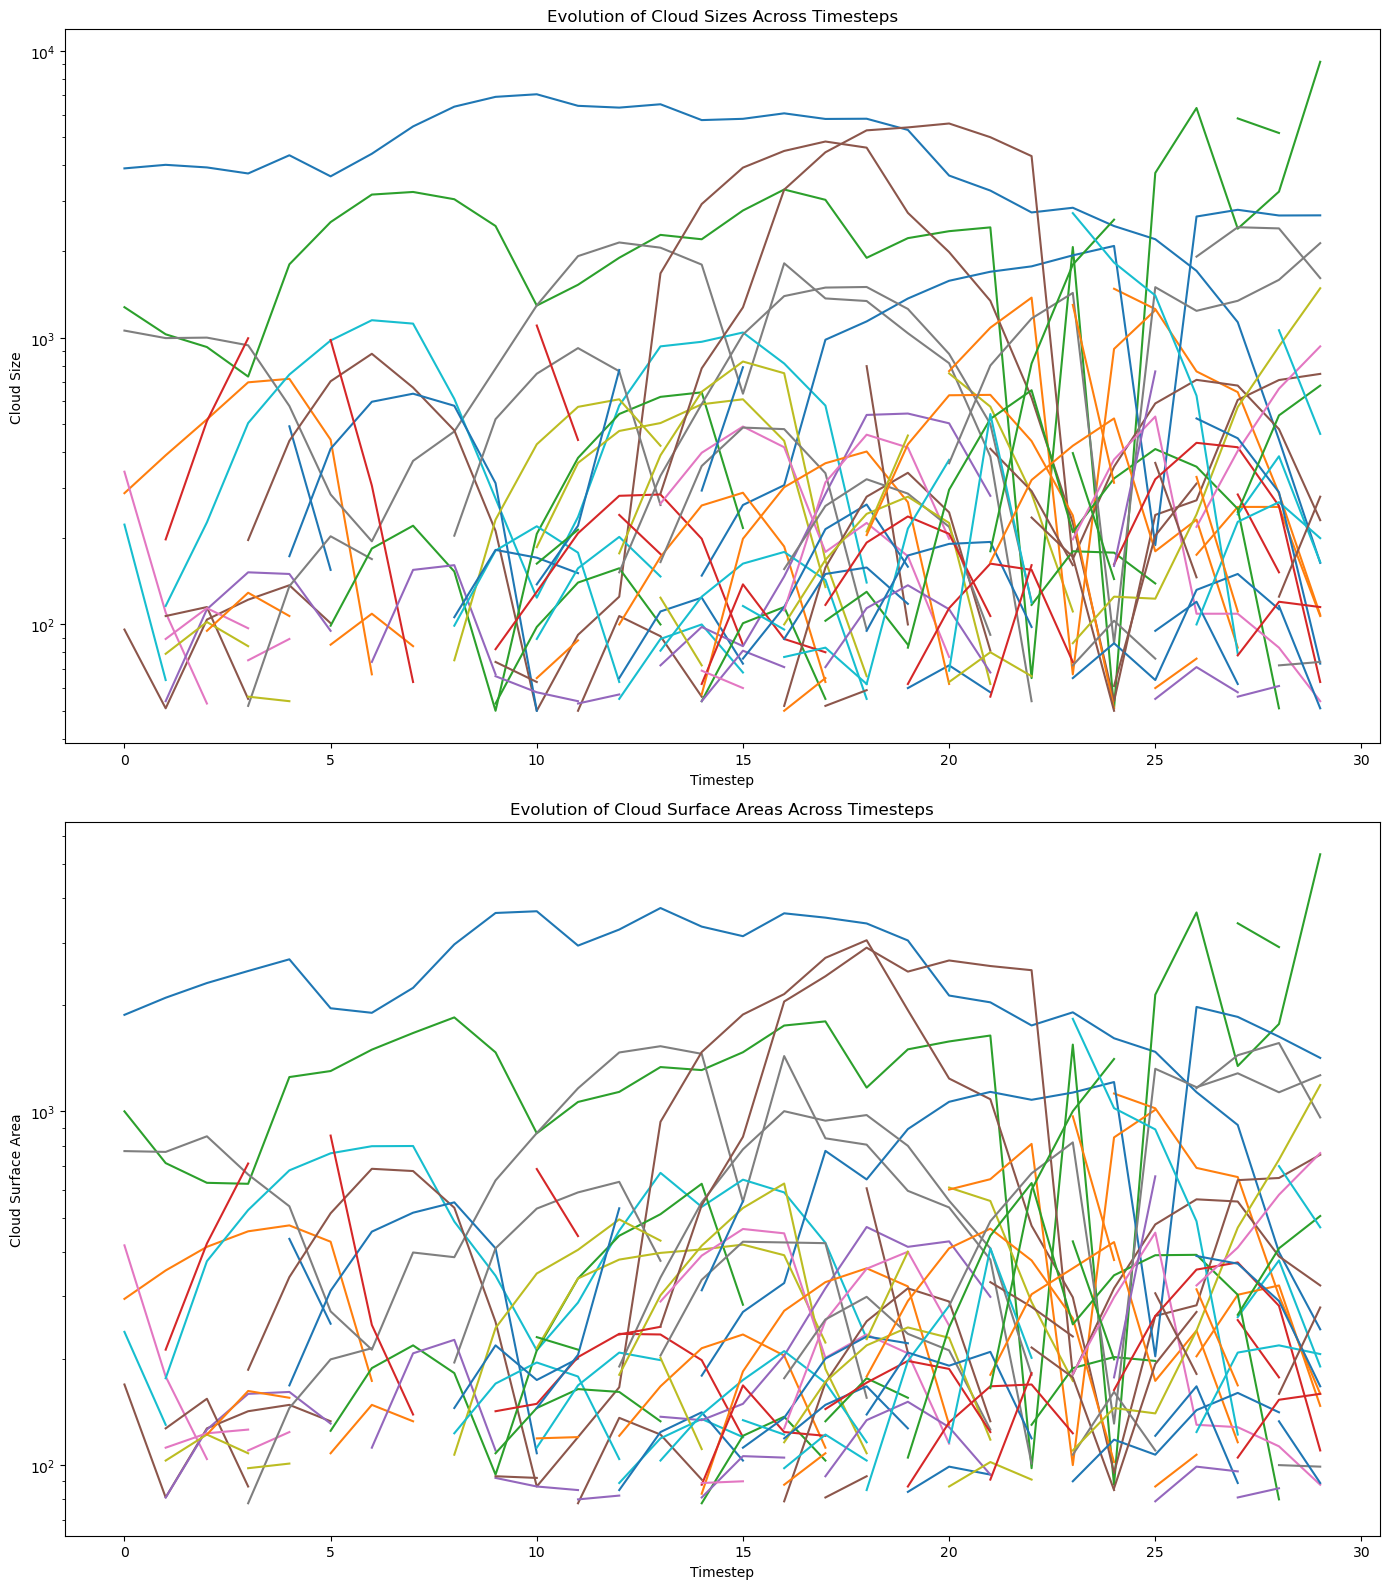

In [12]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file

dataset = Dataset(nc_file, 'r')

# Read cloud sizes and surface areas
cloud_sizes = dataset.variables['size'][:].T  # Transpose to get shape (timesteps, clouds)
cloud_surface_areas = dataset.variables['surface_area'][:].T  # Similarly for surface areas

# Number of timesteps and clouds
num_timesteps = cloud_sizes.shape[0]
num_clouds = cloud_sizes.shape[1]

# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(14, 16))  # Two plots

# Plot for cloud sizes
for cloud_idx in range(num_clouds):
    size_evolution = cloud_sizes[:, cloud_idx]
    # Plot the evolution of sizes
    axes[0].plot(range(num_timesteps), size_evolution, label=f'Cloud {cloud_idx+1}')
axes[0].set_yscale('log')  # Use log scale for cloud sizes
axes[0].set_xlabel('Timestep')
axes[0].set_ylabel('Cloud Size')
axes[0].set_title('Evolution of Cloud Sizes Across Timesteps')

# Plot for surface areas
for cloud_idx in range(num_clouds):
    surface_area_evolution = cloud_surface_areas[:, cloud_idx]
    # Plot the evolution of surface areas
    axes[1].plot(range(num_timesteps), surface_area_evolution, label=f'Cloud {cloud_idx+1}')
axes[1].set_yscale('log')  # Use log scale for surface areas
axes[1].set_xlabel('Timestep')
axes[1].set_ylabel('Cloud Surface Area')
axes[1].set_title('Evolution of Cloud Surface Areas Across Timesteps')

plt.tight_layout()  # Adjust layout to not overlap
#plt.legend()
plt.show()

dataset.close()


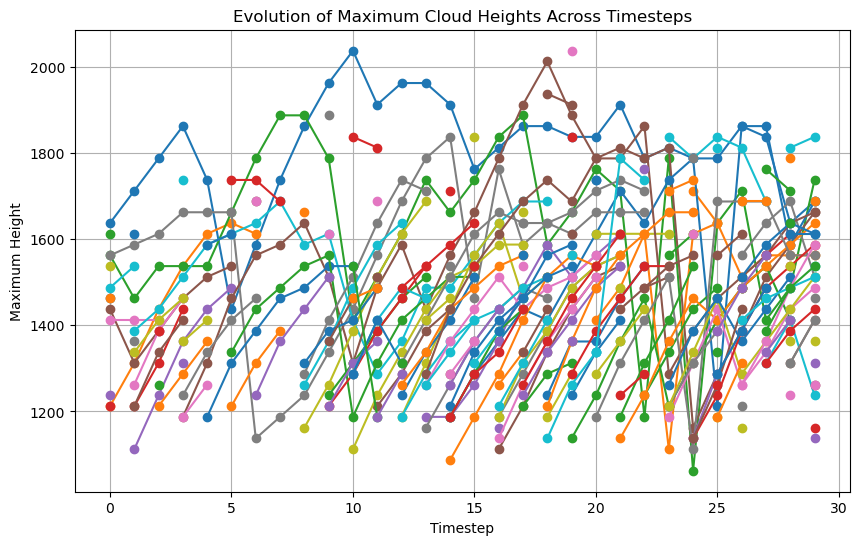

In [13]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

# Load the NetCDF file
nc_file = '../cloud_results.nc'
dataset = Dataset(nc_file, 'r')

# Read maximum heights, assuming variable name is 'max_height' with dimensions ('track', 'time')
max_heights = dataset.variables['max_height'][:].T  # Transpose to match ('time', 'track')

# Filter out tracks where all entries are NaN (no active data throughout the simulation)
max_heights = np.array([track for track in max_heights if not np.all(np.isnan(track))])

# Number of timesteps and clouds
num_timesteps = max_heights.shape[0]
num_clouds = max_heights.shape[1]

# Generate a plot for maximum heights
plt.figure(figsize=(10, 6))
for cloud_idx in range(num_clouds):
    height_evolution = max_heights[:, cloud_idx]
    # Plot only if there are actual data points to plot
    if np.any(~np.isnan(height_evolution)):
        plt.plot(range(num_timesteps), height_evolution, marker='o', label=f'Cloud {cloud_idx+1}')

plt.xlabel('Timestep')
plt.ylabel('Maximum Height')
plt.title('Evolution of Maximum Cloud Heights Across Timesteps')
#plt.legend()
plt.grid(True)
plt.show()

dataset.close()

# Optionally print the maximum heights data
#print(max_heights)


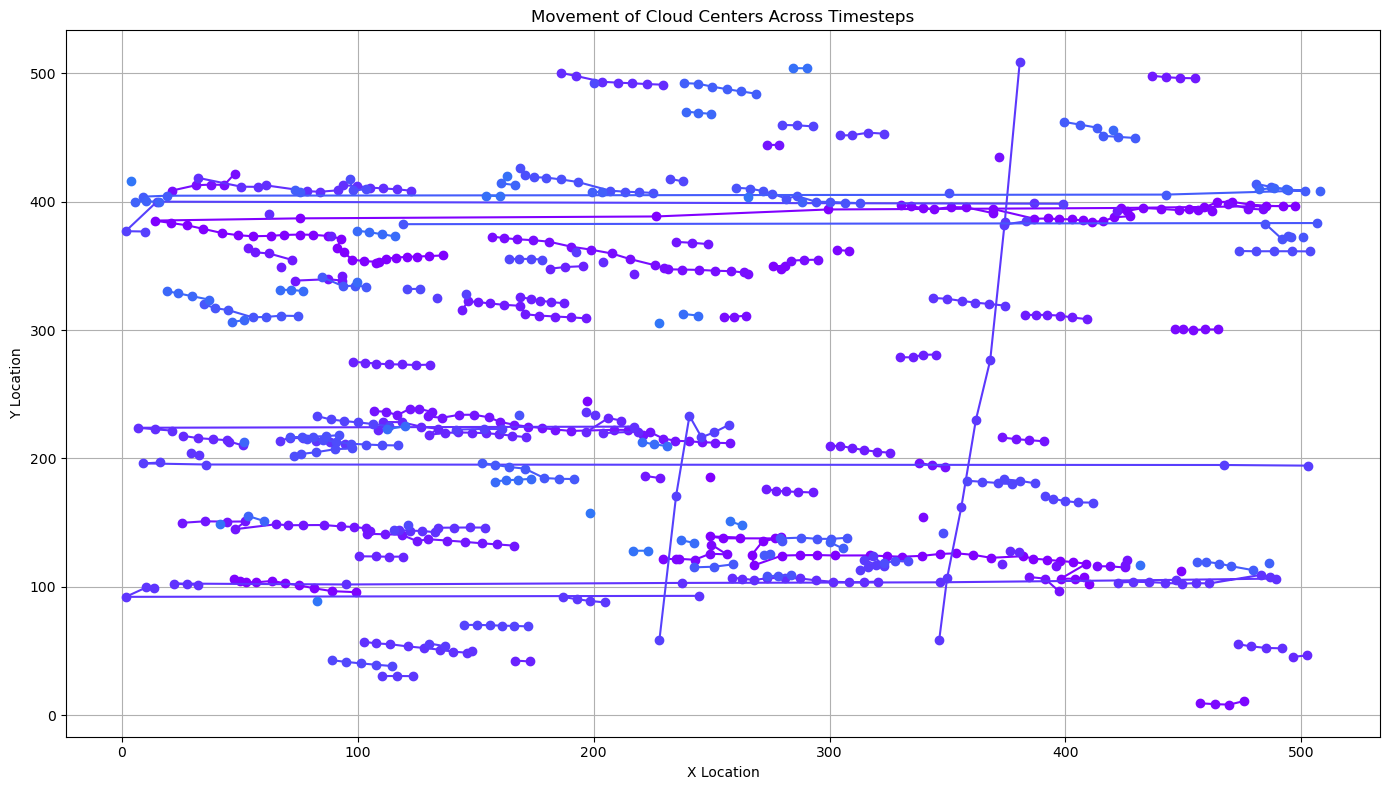

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import matplotlib.cm as cm

nc_file = '../cloud_results.nc'
dataset = Dataset(nc_file, 'r')

# Reading cloud center locations
x_centers = dataset.variables['location_x'][:]  
y_centers = dataset.variables['location_y'][:]

# Number of clouds and timesteps
num_clouds, num_timesteps = x_centers.shape

# Generate a color map for clouds
colors = cm.rainbow(np.linspace(0, 1, num_clouds))

# Plot for cloud center movements
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    # Filter out NaN values for x and y centers
    valid_idx = ~np.isnan(x_centers[cloud_idx, :]) & ~np.isnan(y_centers[cloud_idx, :])
    if np.any(valid_idx):  # Check if there are any valid points to plot for this cloud
        plt.plot(x_centers[cloud_idx, valid_idx], y_centers[cloud_idx, valid_idx], '-o', color=colors[cloud_idx], label=f'Cloud {cloud_idx+1}')

plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.title('Movement of Cloud Centers Across Timesteps')
plt.grid(True)
plt.tight_layout()
#plt.legend()
#plt.savefig('clouds_movement_with_no_drift_minsize50_lcond0.001.pdf')
plt.show()

dataset.close()


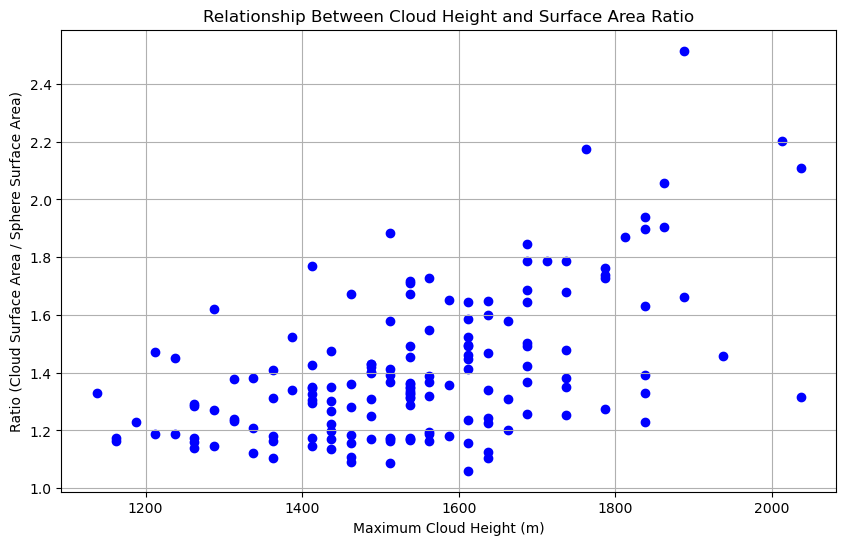

In [15]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path
dataset = Dataset(nc_file, 'r')

# Read maximum heights, surface areas, and cloud sizes
max_heights = dataset.variables['max_height'][:].T  # Transpose to match ('time', 'track')
cloud_surface_areas = dataset.variables['surface_area'][:].T
cloud_sizes = dataset.variables['size'][:].T

# Calculate the maximum height for each cloud across all timesteps
max_cloud_heights = np.nanmax(max_heights, axis=0)

# Calculate maximum surface areas for each cloud across all timesteps
max_surface_areas = np.nanmax(cloud_surface_areas, axis=0)

# Assume cloud size as volume for simplicity (replace with actual volume if different)
cloud_volumes = np.nanmax(cloud_sizes, axis=0)  # Use maximum size as proxy for volume

# Calculate the surface area of a sphere with equivalent volume
# Surface area of a sphere: 4 * pi * r^2; Volume of a sphere: (4/3) * pi * r^3
# r = (3 * volume / (4 * pi))^(1/3)
# Surface area = 4 * pi * (3 * volume / (4 * pi))^(2/3)
sphere_surface_areas = 4 * np.pi * ((3 * cloud_volumes / (4 * np.pi))**(2/3))

# Calculate ratio of cloud surface area to sphere surface area
ratios = max_surface_areas / sphere_surface_areas

# Filter valid ratios and corresponding heights
valid_indices = (~np.isnan(ratios)) & (~np.isnan(max_cloud_heights))
ratios = ratios[valid_indices]
heights = max_cloud_heights[valid_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(heights, ratios, color='blue')
plt.xlabel('Maximum Cloud Height (m)')
plt.ylabel('Ratio (Cloud Surface Area / Sphere Surface Area)')
plt.title('Relationship Between Cloud Height and Surface Area Ratio')
plt.grid(True)
plt.show()

dataset.close()


In [4]:
# import xarray as xr

# ds = xr.open_dataset('../cloud_results.nc')
# ids = ds['track']

# for i in range (0,len(ids)):
    
#     track_id = ids[i]

#     # Extract the locations of the cloud across all timesteps
#     location_x = ds['location_x'].sel(track=track_id)
#     location_y = ds['location_y'].sel(track=track_id)

#     # Plotting the cloud's movement
#     plt.figure(figsize=(10, 6))
#     plt.plot(location_x, location_y, marker='o', linestyle='-', markersize=5, label=f'Cloud {track_id} Movement')
#     plt.xlabel('X Location')
#     plt.ylabel('Y Location')
#     plt.title('Movement of Cloud Over Time')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

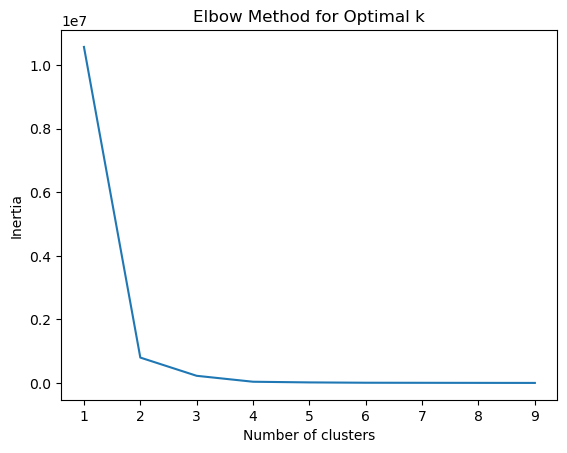

/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


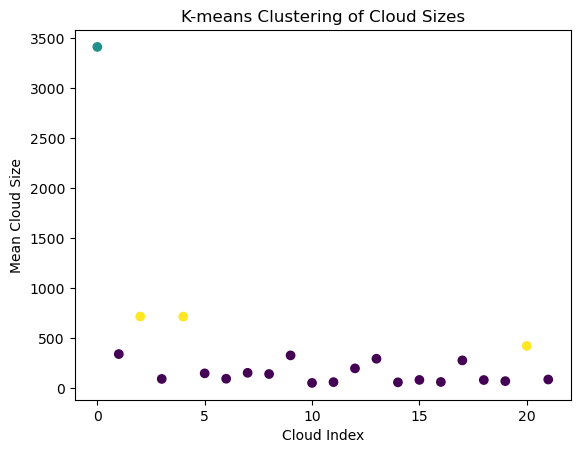

In [5]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Example data: mean size of each cloud over time
# This should be replaced with your actual data
cloud_sizes_mean = np.mean(cloud_sizes, axis=0).reshape(-1, 1)  # Reshape if necessary

# Determine the optimal number of clusters (k) - Example using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cloud_sizes_mean)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Perform K-means clustering with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(cloud_sizes_mean)

# Cluster labels for each cloud
labels = kmeans.labels_

# Visualize the clustering result
plt.scatter(range(len(cloud_sizes_mean)), cloud_sizes_mean, c=labels, cmap='viridis')
plt.xlabel('Cloud Index')
plt.ylabel('Mean Cloud Size')
plt.title('K-means Clustering of Cloud Sizes')
plt.show()


/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

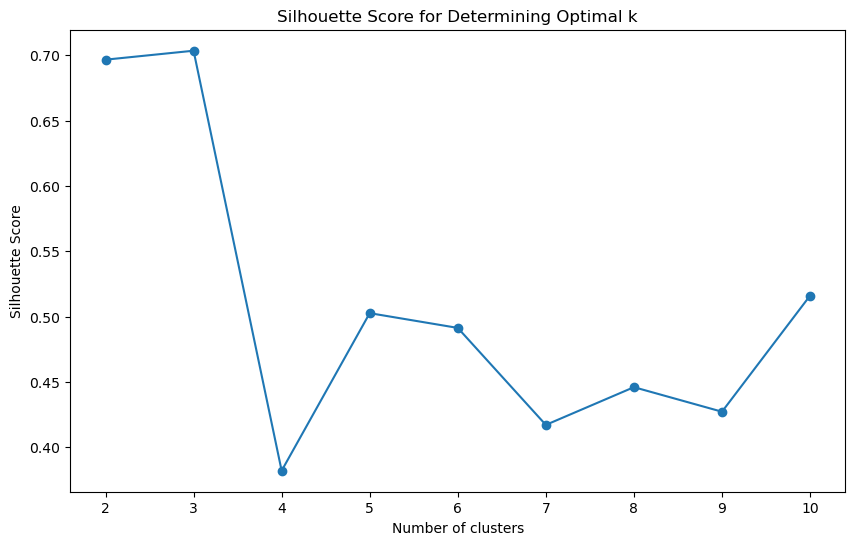

Optimal number of clusters: 3


/Users/jure/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


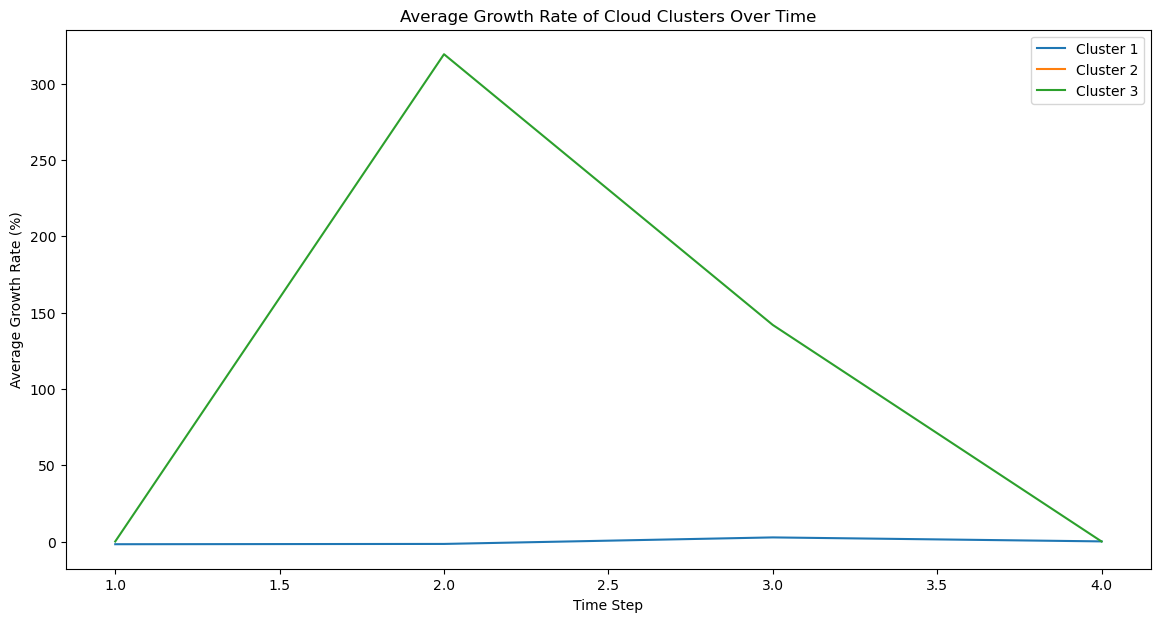

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming cloud_sizes is a NumPy array with shape (timesteps, clouds)
# Calculate growth rates
growth_rates = np.diff(cloud_sizes, axis=0) / cloud_sizes[:-1, :] * 100

# Handle NaN values in growth rates
imputer = SimpleImputer(strategy='mean')
growth_rates_imputed = imputer.fit_transform(growth_rates.T)  # Transpose to get clouds as rows

# Standardize the growth rates
scaler = StandardScaler()
growth_rates_scaled = scaler.fit_transform(growth_rates_imputed)

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
range_n_clusters = range(2, 11)  # Example range, adjust as needed
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(growth_rates_scaled)
    score = silhouette_score(growth_rates_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Determining Optimal k')
plt.show()

# Choose the number of clusters based on the highest silhouette score
optimal_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(growth_rates_scaled)

# Visualize the clustering result by plotting the average growth rate of each cluster over time
plt.figure(figsize=(14, 7))
for i in range(optimal_k):
    cluster_growth_rates = growth_rates[:, labels == i]
    mean_growth = np.mean(cluster_growth_rates, axis=1)
    plt.plot(range(1, growth_rates.shape[0] + 1), mean_growth, label=f'Cluster {i+1}')

plt.xlabel('Time Step')
plt.ylabel('Average Growth Rate (%)')
plt.title('Average Growth Rate of Cloud Clusters Over Time')
plt.legend()
plt.show()
